In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from os import path
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.linear_model import LinearRegression

labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt", "none"]
maxLengths = [20, 55, 148, 403, 1097, 2981, 2000000]
collection_n_values = [64, 32, 16, 8, 4, 2, 1]
collection_sizes = [817857, 1635715, 3271430, 6542860, 13085721, 26171443, 52342886]

home_dir = "/home/katelyn/Documents/COSC490/Stemming"
data_dir_clueweb = path.join(home_dir, "Data/clueweb")
data_dir_wikt = path.join(home_dir, "Data/wikt")

MARKERS = ["o","^","s","*","d", "P", "X"]
markers = itertools.cycle(MARKERS)

### Preparing Data

In [2]:
df_list = list()

for n, l in zip(collection_n_values, maxLengths):
   df = pd.read_csv(path.join(data_dir_clueweb,f"combined/ndcg_{l}-{n}"), sep=" ")
   df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

data_avg = data[data["qid"] == "amean"]
data = data.drop(data[data["qid"] == "amean"].index)

### Document Length

In [3]:
target_data = data_avg

best_nDCG = list()
for length in np.unique(target_data["maxLength"]):
    selected_data = data_avg[data_avg["maxLength"] == length]
    best_nDCG.append(selected_data["ndcg"].max())

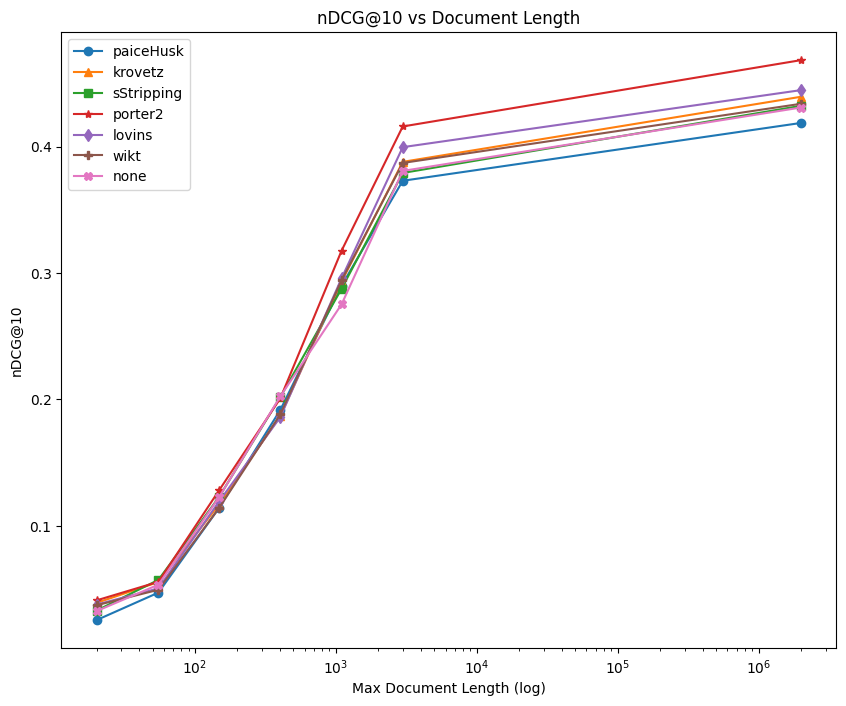

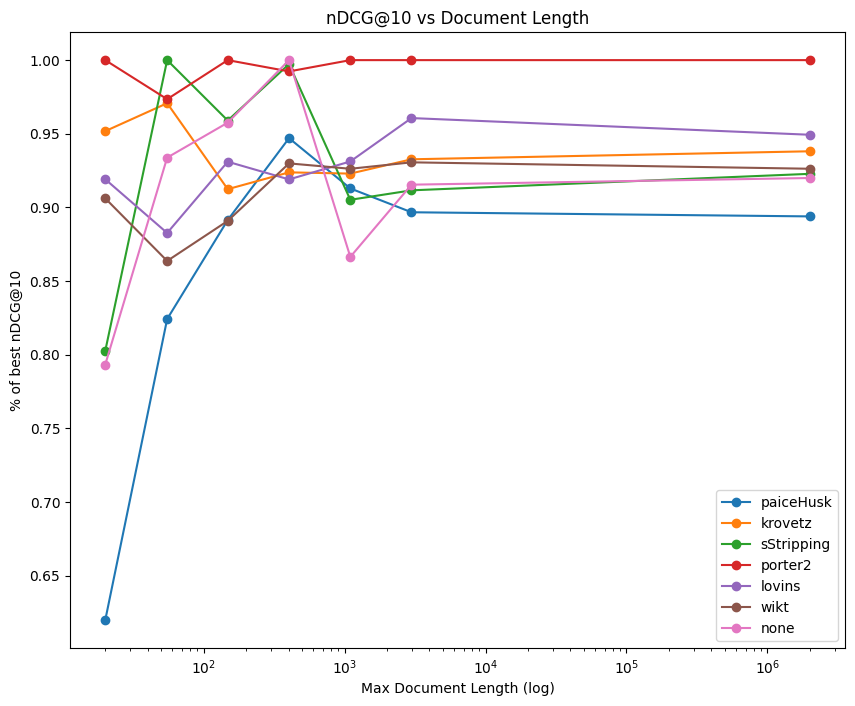

In [4]:
plt.figure(figsize=(10,8))
for stemmer in labels:
    stemmer_data = target_data[target_data["stemmer"] == stemmer]
    plt.plot(stemmer_data["maxLength"], stemmer_data["ndcg"], marker=next(markers), label=stemmer)
    plt.xscale("log")

plt.title("nDCG@10 vs Document Length")
plt.xlabel("Max Document Length (log)")
plt.ylabel("nDCG@10")
plt.legend()
plt.show()

# ----------------------------------------------------------------------

plt.figure(figsize=(10,8))
for stemmer in labels:
    stemmer_data = target_data[target_data["stemmer"] == stemmer]
    stemmer_values = np.array(stemmer_data["ndcg"])/best_nDCG
    plt.plot(stemmer_data["maxLength"], stemmer_values, "o-", label=stemmer)
    plt.xscale("log")
plt.title("nDCG@10 vs Document Length")
plt.xlabel("Max Document Length (log)")
plt.ylabel("% of best nDCG@10")
plt.legend()
plt.show()

### Collection Size

In [7]:
best_nDCG = list()
for size in collection_sizes:
    selected_data = data_avg[data_avg["collectionSize"] == size]
    best_nDCG.append(selected_data["ndcg"].max())

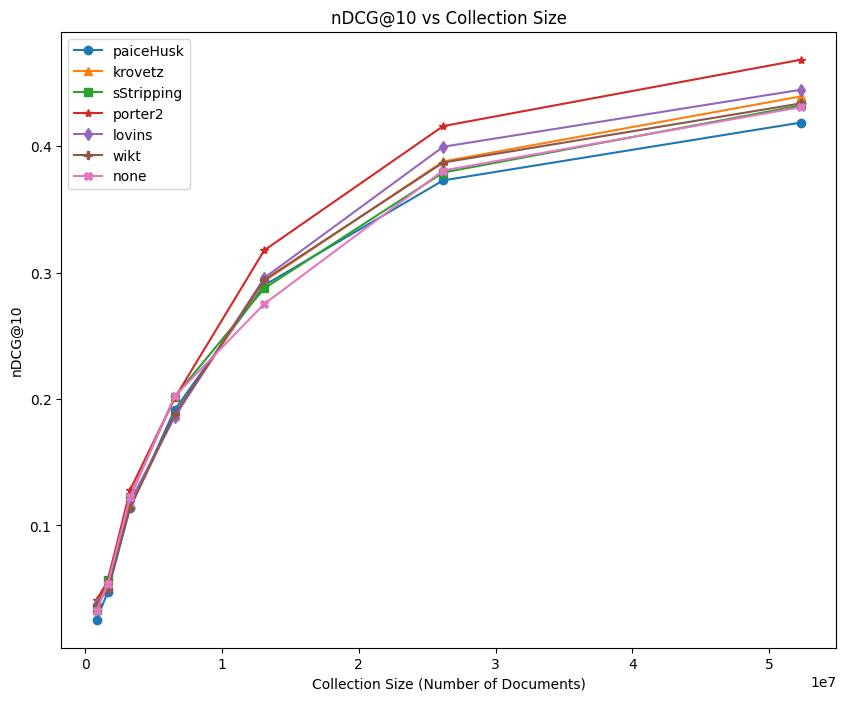

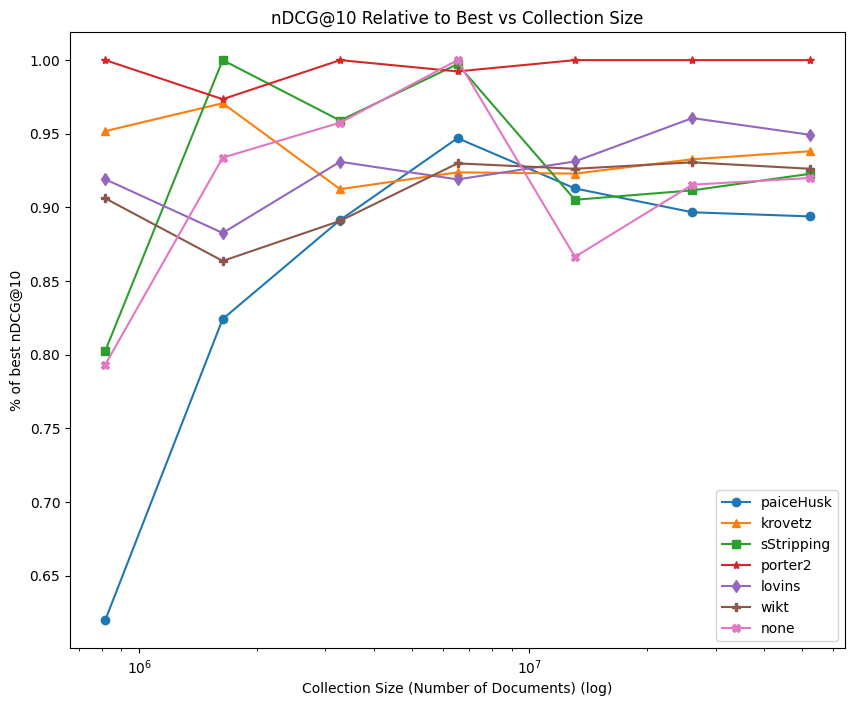

In [8]:
plt.figure(figsize=(10,8))
for stemmer in labels:
    stemmer_data = data_avg[data_avg["stemmer"] == stemmer]
    plt.plot(stemmer_data["collectionSize"], stemmer_data["ndcg"], marker=next(markers), label=stemmer)

plt.title("nDCG@10 vs Collection Size")
plt.xlabel("Collection Size (Number of Documents)")
plt.ylabel("nDCG@10")
plt.legend()

# ----------------------------------------------------------------------

plt.figure(figsize=(10,8))
for stemmer in labels:
    stemmer_data = data_avg[data_avg["stemmer"] == stemmer]
    stemmer_values = np.array(stemmer_data["ndcg"])/best_nDCG
    plt.plot(stemmer_data["collectionSize"], stemmer_values, marker=next(markers), label=stemmer)
    plt.xscale("log")

plt.title("nDCG@10 Relative to Best vs Collection Size")
plt.xlabel("Collection Size (Number of Documents) (log)")
plt.ylabel("% of best nDCG@10")
plt.legend()

### Statistical Significance

In [9]:
#t-test between the porter2 stemmer (one of the best performing) and no stemming
for size,length in zip(collection_sizes, maxLengths):
    s = list()
    n = list()
    target_data = data[data["collectionSize"] == size]
    s = target_data[target_data["stemmer"] == "porter2"].loc[:,"ndcg"].tolist()
    n = target_data[target_data["stemmer"] == "none"].loc[:,"ndcg"].tolist()
    print(f"Length: {length} Size: {size} {stats.ttest_rel(s,n)}")

Length: 20 Size: 817857 TtestResult(statistic=1.649475697337293, pvalue=0.10221981745287724, df=99)
Length: 55 Size: 1635715 TtestResult(statistic=0.5429843601056838, pvalue=0.5883609957892648, df=99)
Length: 148 Size: 3271430 TtestResult(statistic=0.7908501242227883, pvalue=0.4309219647453356, df=99)
Length: 403 Size: 6542860 TtestResult(statistic=-0.12535035897024938, pvalue=0.9005003813613255, df=99)
Length: 1097 Size: 13085721 TtestResult(statistic=2.943675655269866, pvalue=0.004041175809869398, df=99)
Length: 2981 Size: 26171443 TtestResult(statistic=2.4350107595483186, pvalue=0.016680929073823233, df=99)
Length: 2000000 Size: 52342886 TtestResult(statistic=2.1703210420603334, pvalue=0.032374053378288414, df=99)


In [10]:
#t-test between paiceHusk and none
for size,length in zip(collection_sizes, maxLengths):
    s = list()
    n = list()
    target_data = data[data["collectionSize"] == size]
    s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"ndcg"].tolist()
    n = target_data[target_data["stemmer"] == "none"].loc[:,"ndcg"].tolist()
    print(f"Length: {length} Size: {size} {stats.ttest_rel(s,n)}")

Length: 20 Size: 817857 TtestResult(statistic=-1.069497980575698, pvalue=0.28744604486210645, df=99)
Length: 55 Size: 1635715 TtestResult(statistic=-1.2376007523971744, pvalue=0.21879135603780167, df=99)
Length: 148 Size: 3271430 TtestResult(statistic=-0.9266612893962689, pvalue=0.3563559825072655, df=99)
Length: 403 Size: 6542860 TtestResult(statistic=-0.9212614647445284, pvalue=0.3591535050392115, df=99)
Length: 1097 Size: 13085721 TtestResult(statistic=1.0476878799975906, pvalue=0.2973335266172958, df=99)
Length: 2981 Size: 26171443 TtestResult(statistic=-0.4253213621070543, pvalue=0.671525524602387, df=99)
Length: 2000000 Size: 52342886 TtestResult(statistic=-0.6122980873747164, pvalue=0.5417443633108274, df=99)


In [11]:
#t-test between porter2 and paiceHusk
for size,length in zip(collection_sizes, maxLengths):
    s = list()
    n = list()
    target_data = data[data["collectionSize"] == size]
    s = target_data[target_data["stemmer"] == "porter2"].loc[:,"ndcg"].tolist()
    n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"ndcg"].tolist()
    print(f"Length: {length} Size: {size} {stats.ttest_rel(s,n)}")

Length: 20 Size: 817857 TtestResult(statistic=1.9489115152315934, pvalue=0.05413641391432193, df=99)
Length: 55 Size: 1635715 TtestResult(statistic=1.2749639213327384, pvalue=0.20530610113757236, df=99)
Length: 148 Size: 3271430 TtestResult(statistic=1.7206549421069608, pvalue=0.08843753341409644, df=99)
Length: 403 Size: 6542860 TtestResult(statistic=1.1407765323545604, pvalue=0.25671505753067153, df=99)
Length: 1097 Size: 13085721 TtestResult(statistic=2.328837073462372, pvalue=0.021900702192855025, df=99)
Length: 2981 Size: 26171443 TtestResult(statistic=2.360889513911385, pvalue=0.020190438018842086, df=99)
Length: 2000000 Size: 52342886 TtestResult(statistic=2.653878331834531, pvalue=0.009271612457695729, df=99)


In [12]:
#t-test wikt and none
for size,length in zip(collection_sizes, maxLengths):
    s = list()
    n = list()
    target_data = data[data["collectionSize"] == size]
    s = target_data[target_data["stemmer"] == "wikt"].loc[:,"ndcg"].tolist()
    n = target_data[target_data["stemmer"] == "none"].loc[:,"ndcg"].tolist()
    print(f"Length: {length} Size: {size} {stats.ttest_rel(s,n)}")

Length: 20 Size: 817857 TtestResult(statistic=1.0226023659250632, pvalue=0.308988228357721, df=99)
Length: 55 Size: 1635715 TtestResult(statistic=-1.0426127079170528, pvalue=0.2996670491276548, df=99)
Length: 148 Size: 3271430 TtestResult(statistic=-1.0584921845311548, pvalue=0.29240696023497526, df=99)
Length: 403 Size: 6542860 TtestResult(statistic=-1.1802898339159518, pvalue=0.24071312753293497, df=99)
Length: 1097 Size: 13085721 TtestResult(statistic=1.3946271166327155, pvalue=0.16624985772390913, df=99)
Length: 2981 Size: 26171443 TtestResult(statistic=0.39586964788133905, pvalue=0.6930530432301458, df=99)
Length: 2000000 Size: 52342886 TtestResult(statistic=0.1718614466393791, pvalue=0.8638972766048061, df=99)
